## Object Recognition
In this project, we will perform:
* Import datasets from Keras
* Use one-hot vectors for categorical labels
* Addlayers to a Keras model
* Load pre-trained weights
* Make predictions using a trained Keras model

The dataset we will be using is the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

### 1. Loading the Data

Let's dive right in! In these first few cells, we will import necessary packages, load the dataset, and plot some example images.

In [2]:
# Load necessary packages
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot  as plt
import numpy as np
from PIL import Image

Using TensorFlow backend.


In [4]:
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [6]:
# Now for a single image 
print(X_train[0].shape)

(32, 32, 3)


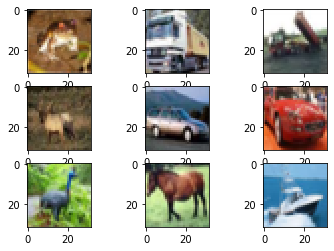

In [10]:
# create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i].transpose([0,1,2])
    plt.imshow(img)
    
# show the plot
plt.show()

### 2. Preprocessing the dataset

First things first, we need to preprocess the dataset so the images and labels are in a form that Keras can ingest. To start, we'll define a NumPy seed for reproducibility, then normalize the images. 

Furthermore, we will also convert our class labels to one-hot vectors.  This is a standard output format for neural networks. 

In [6]:
# Building a convolutional neural network for object recognition on CIFAR-10

# fix random seed for reproducibility
seed = 6
np.random.seed(seed) 

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000L, 1L)
[6]


The class labels are a single integer value (0-9).  What we really want is a one-hot vector of length ten.  For example, the class label of 6 should be denoted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0].  We can accomplish this using the np_utils.to_categorical() function.

In [8]:
# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000L, 10L)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 3. Building the All-CNN

Using the paper as a reference, we can implement the All-CNN network in Keras.  Keras models are built by simply adding layers, one after another. 

To make things easier for us later, we will wrap this model in a function, which will allow us to quickly and neatly generate the model later on in the project. 

In [9]:
# start building the model - import necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(3, 32, 32)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model


### 4. Defining Parameters and Training the Model

We're all set! We are ready to start training our network.  In the following cells, we will define our hyper parameters, such as learning rate and momentum, define an optimizer, compile the model, and fit the model to the training data.

In [ ]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# define additional training parameters
epochs = 2
batch_size = 32

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

In [11]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# define weights and build model
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 96, 32, 32)        2688      
_________________________________________________________________
activation_8 (Activation)    (None, 96, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 96, 32, 32)        83040     
_________________________________________________________________
activation_9 (Activation)    (None, 96, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 96, 16, 16)        83040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 96, 16, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 192, 16, 16)       166080    
__________

### 6. Making Predictions

Using the pretrained weights, we were able to achieve an accuracy of nearly 90 percent! Let's leverage this network to make some predictions. To start, we will generate a dictionary of class labels and names by referencing the website for the CIFAR-10 dataset:

https://www.cs.toronto.edu/~kriz/cifar.html

Next, we'll make predictions on nine images and compare the results to the ground-truth labels.  Furthermore, we will plot the images for visual reference, this is object recognition after all.

In [12]:
# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 38ms/step


In [13]:
# print our predictions
print predictions

[[3.34925559e-19 2.15254936e-19 1.36196375e-11 7.40431005e-14
  9.99999940e-01 7.98335886e-09 7.02512345e-16 6.67017162e-08
  2.10513932e-21 6.66427573e-18]
 [6.29248118e-13 3.24948571e-14 3.37529002e-07 4.88843303e-04
  7.45293937e-06 9.98557985e-01 7.16789605e-09 9.45368258e-04
  4.90906751e-12 1.51182011e-10]
 [3.73208201e-24 6.11103406e-24 7.35296563e-19 2.90923193e-17
  1.78009732e-22 2.12189032e-16 1.00000000e+00 1.14791947e-22
  8.27286905e-27 8.52567242e-22]
 [2.25064471e-18 7.57587193e-20 4.78787632e-09 1.00000000e+00
  4.77509943e-09 2.97874295e-11 1.40486418e-12 1.34754768e-15
  1.82800220e-19 1.35613839e-16]
 [3.47531121e-33 1.00000000e+00 1.36119330e-40 7.24741207e-37
  8.84121240e-41 1.55544130e-43 1.24009309e-40 1.69776626e-35
  1.02667296e-26 3.85470124e-21]
 [6.84771727e-31 1.00000000e+00 3.20376761e-34 4.26636929e-31
  1.68708488e-39 2.88710688e-34 4.96825556e-31 5.68712555e-30
  1.12215352e-30 2.82543908e-19]
 [8.00859053e-19 6.52500424e-21 2.11737294e-10 1.00000000e

In [14]:
# these are individual class probabilities, should sum to 1.0 (100%)
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [15]:
# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions,axis=-1)
print class_result

[4 5 6 3 1 1 3 6 8]


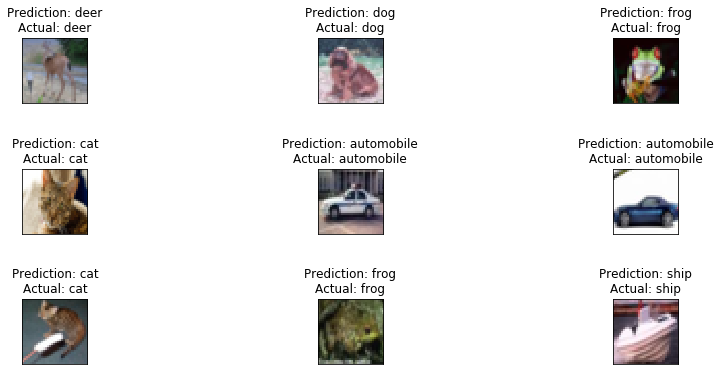

In [16]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img.transpose([1,2,0]))
    
# show the plot
plt.show()